# Product recommendation model

This notebook trains and evaluates machine learning models (Random Forest, Logistic Regression, and XGBoost) to classify products based on features from a merged customer dataset. It includes data loading, cleaning, splitting, model training with hyperparameter tuning, and performance evaluation.

Import Library

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')


Load and Clean Data

In [21]:
try:
    data_df = pd.read_csv("../merged_customer_data.csv", nrows=1000)
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    data_df.dropna(inplace=True)
    print(f" Data loaded: {data_df.shape[0]} samples, {data_df.shape[1]} columns")
except FileNotFoundError:
    print(" Error: 'merged_customer_data.csv' not found.")
except Exception as e:
    print(f" Error loading dataset: {e}")


 Data loaded: 61 samples, 11 columns


Feature Selection and Splitting


In [22]:
# Features & target
X = data_df.drop(columns=["product_category"])
y = data_df["product_category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Model

In [23]:
# Prepare features
X = data_df.drop(columns=["product_category", "customer_id_new", "customer_id_legacy", "transaction_id", "purchase_date"])

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Target
y = data_df["product_category"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Make Predictions & Evaluate

In [25]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy: {accuracy:.2f}")
print(" Classification Report:")
print(classification_report(y_test, y_pred))


 Accuracy: 0.23
 Classification Report:
              precision    recall  f1-score   support

       Books       0.00      0.00      0.00         2
    Clothing       0.20      0.50      0.29         2
 Electronics       0.00      0.00      0.00         2
   Groceries       0.00      0.00      0.00         2
      Sports       0.50      0.40      0.44         5

    accuracy                           0.23        13
   macro avg       0.14      0.18      0.15        13
weighted avg       0.22      0.23      0.21        13



Check Class Distribution

In [26]:
print("Class Distribution:\n")
print(y.value_counts())


Class Distribution:

product_category
Sports         16
Electronics    15
Clothing       13
Books          11
Groceries       6
Name: count, dtype: int64


Feature Importance Plot

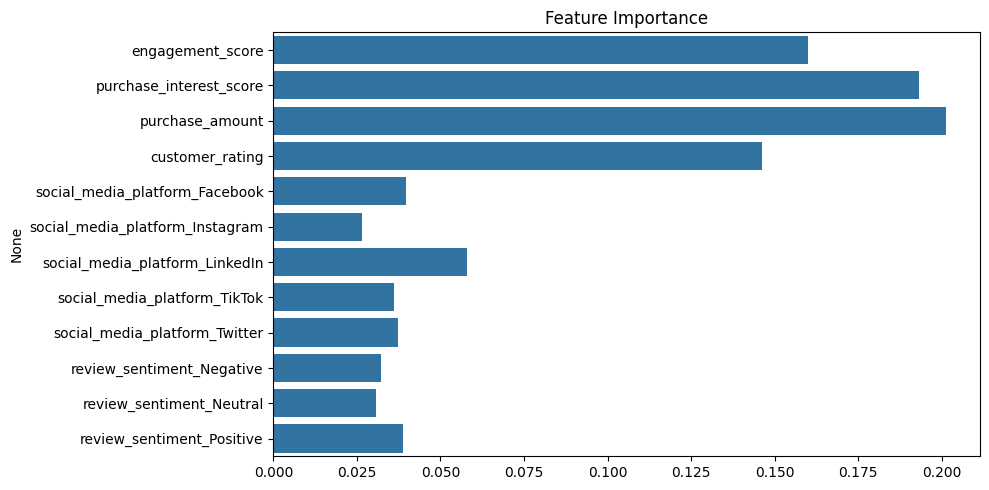

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
